In [1]:
import os
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from DLITE.SurfaceEvolver import SurfaceEvolver

In [2]:
os.chdir(r'../Notebooks/data/Synthetic_data/Fig_2')
number = 5
name_first = 'surface_dec_edge_groups_80_150_numbers_'
name_end = '.fe.txt'

In [3]:
SurfaceEvolverInstance = SurfaceEvolver(name_first, name_end)

In [4]:
colonies = SurfaceEvolverInstance.FOV_Drift(number, solver = 'CellFIT')

Number of fit edges: 122
Number of cells 25 25
Solver is CellFIT
First colony {'0': <DLITE.cell_describe.colony object at 0x1232a4f60>}
Next colony number 1
Next colony number 2
Next colony number 3
Next colony number 4
Next colony number 5
Next colony number 6
Next colony number 7
Next colony number 8
Next colony number 9
Next colony number 10


In [5]:
colonies2 = SurfaceEvolverInstance.FOV_Drift(number, solver = 'DLITE')

Number of fit edges: 122
Number of cells 25 25
guess tension is [0.089, 0.912, 0.668, 0.176, 0.235, 0.385, 0.569, 0.025, 0.796, 0.492, 0.356, 0.064, 0.552, 0.748, 0.216, 0.505, 0.211, 0.716, 0.394, 0.685, 0.61, 0.61, 0.332, 0.578, 0.35, 0.051, 0.745, 0.465, 0.73, 0.704, 0.165, 0.264, 0.82, 0.813, 0.725, 0.345, 0.638]
Function value 0.33619390273442035
Solution [0.77716951 0.74859952 0.75155598 0.76946953 0.50204697 0.56811775
 0.49662904 0.95774743 0.48326001 0.59845297 0.47726293 0.57811819
 0.54965102 0.70868415 0.56962004 0.7111018  0.73596481 0.74720999
 0.7236199  0.70233478 0.69233201 0.59008295 0.5352318  0.55555795
 0.53774463 0.30021511 0.37259546 0.42773184 0.43320967 0.36461548
 0.05947939 0.39704861 0.42765077 0.2124467  0.18352788 0.20465442
 0.638     ]


-----------------------------
guess pressure is [0.0027669410209296016, 0.0027669410209296016, 0.0027669410209296016, 0.0027669410209296016, 0.0027669410209296016]
Function value 1.4350455638961655e-05
Solution [0.001675

Function value 2.2136482477041217
Solution [0.57682376 0.70483233 0.64962113 0.604465   0.89009441 0.65836786
 0.64258555 0.65426342 0.59911884 0.70618197 0.88163468 0.91208933
 0.94130088 0.89653822 0.63726887 0.63112691 0.67602751 0.83591956
 0.83144711 0.85057527 0.62959246 0.66915759 0.68186174 0.44261946
 0.59913926 0.79812362 0.53619541 0.4171571  0.63602372 0.6903766
 0.20090837 0.79999266 0.48709909 0.07064677 0.3805886  0.81128191
 0.31322912 0.27056121 0.29003877 0.18528805 0.20511279 0.2528578
 0.46952395 0.42133222 0.56794782 0.72035477 0.66264536 0.45924866
 0.91166436 0.75924373 0.50415465 0.56951464 0.80713893 0.67205993
 0.84859166 0.4926308  0.61124705 0.58027727 0.59711816 0.49081807
 0.69227831]


-----------------------------
guess pressure is [0.004688403926911879, 0.0021695665653141396, 0.00395048874573633, 0.00395048874573633, 0.0027329918465779897, 0.0033447323432823223, 0.0019390812933193548, 0.0024522481964566125, 0.0027389759408283153, 0.0027389759408283153]


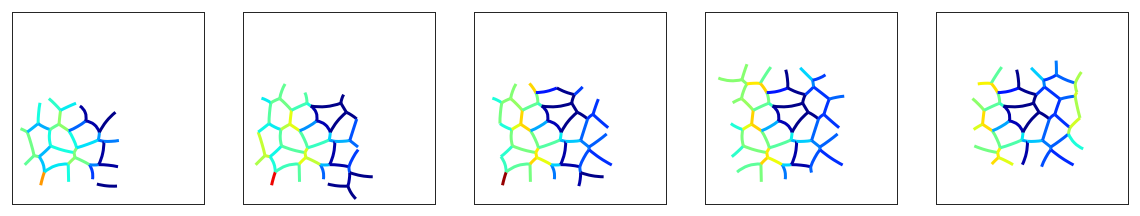

In [8]:
%matplotlib inline
sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,2, 4,6, 8]

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.ground_truth for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=450, max_x=550, min_y=430, max_y=550, 
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
#     ax.set(xlim = [400,580], ylim = [400,580], aspect = 1)
    ax.set(xlim = [200,800], ylim = [200,800], aspect = 1)


In [9]:
from DLITE.PlottingFunctions import PlottingFunctions
PlottingFunctionsInstance = PlottingFunctions()

In [10]:
# We first find labels of edges that are present in all the colonies
common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

common_edge_labels2 = PlottingFunctionsInstance.get_repeat_edge(colonies2)
common_cell_labels2 = PlottingFunctionsInstance.get_repeat_cell(colonies2)

In [11]:
# Make the dataframes
edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = True)

# Make the dataframes
edges_dataframe2, cells_dataframe2 = PlottingFunctionsInstance.seaborn_plot(None, colonies2,
                                                                                  common_edge_labels2,
                                                                                  common_cell_labels2,
                                                                                  ground_truth = True)

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1352: RuntimeWarning: invalid value encountered in true_divide
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1360: RuntimeWarning: invalid value encountered in true_divide
  - min_pres) / float(max_pres - min_pres))


In [12]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

ground_truth_tension_table = edges_dataframe.pivot_table(
        values='Ground_truth', 
        index=['Edge_Labels'], 
        columns='Time')

tension_table2 = edges_dataframe2.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

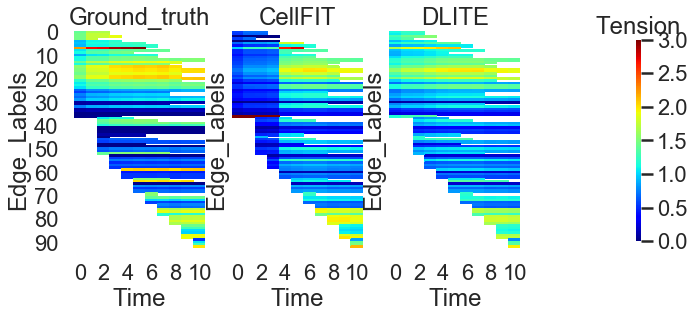

In [14]:
import seaborn as sns

sns.set_context('poster')
fig, axn = plt.subplots(1, 3, figsize = (8,4),sharey=True)
cbar_ax = fig.add_axes([1.1, .15, .01, .7], title = 'Tension')

for i, ax in enumerate(axn.flat):
    if i == 0:
        df = ground_truth_tension_table
        title = 'Ground_truth'
    elif i == 1:
        df = tension_table
        title = 'CellFIT'
    elif i == 2:
        df = tension_table2
        title = 'DLITE'
    ax.set_title(title)
    sns.heatmap(df, ax=ax,
                cbar=i == 0, vmin=0, vmax=3, cmap = 'jet',
                cbar_ax=None if i else cbar_ax)